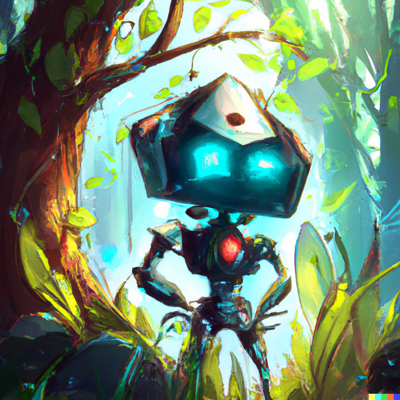

'Solar punk forest guardian source: DALLE·2'

In [8]:
from PIL import Image
smol_forest_guardian = Image.open("./DALL·E-digital_art_cute_solarpunk_forest_guardian_robot.png")
display(smol_forest_guardian.resize((400,400)), "Solar punk forest guardian source: DALLE·2")

This little forest robot was generated via [OpenAI's DAlle·2](https://labs.openai.com/) model from my simple prompt:  

    “Digital art cute solarpunk forest guardian robot”

This depiction symbolizes an idea of I have been hooked on for a long time.  
I am not sure exactly when it started to form, but I think it may go back to as a child when my aunt introduced me to my first Miyazaki movies:  
My Neighbor Totoro, Spirited Away, and Castle in the Sky

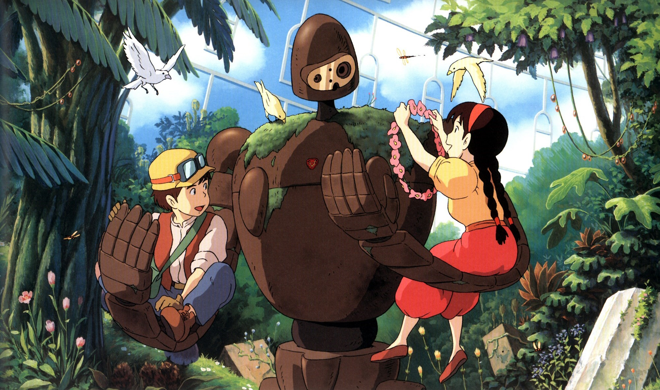

'Castle in the Sky Guardian source: https://characterdesignreferences.com/art-of-animation-9/art-of-castle-in-the-sky'

In [9]:
big_guardian = Image.open("./castle_in_sky_guardian.jpg")
ratio = 0.33
new_dimens = (round(big_guardian.width * ratio), round(big_guardian.height * ratio))
display(big_guardian.resize(new_dimens), "Castle in the Sky Guardian source: https://characterdesignreferences.com/art-of-animation-9/art-of-castle-in-the-sky")

I believe most Miyazaki fans can relate to the sense of awe they feel when watching his films.  
He has a way of instilling a profound respect for nature by capturing its simple beauty and reminding us how much we take it for granted on a daily basis.  
His films promote protecting nature from human exploitation and reconnecting with the natural world around us.  
This Laputian robot from the Castle in the Sky (depicted above) is a particularly interesting example of that.  

<details>
    <summary><b>🙉❗ Spoiler alert: Press here if you are ok with that</b></summary><br>
This robot is a deadly weapon built to defend the royal family of Laputa (the name of the Castle in the Sky).<br>
You see glimpses of its overwhelming destructive power in the film.<br>
However, on the Castle, we find the same type of robot tending the gardens, befriending animals, and seeming to find peace with nature.<br>
This stark contrast in roles serves as a solid warning for the development of technologies like AI.<br>
Do we choose peace or chaos?<br>
</details>
<br>


Stemming from that influence, my mission is to develop technology that better serves the rights of non-human animals and protects our shared ecosystems.  
The future I see includes AI trained to respect nature more deeply than we humans do today, and teach us about the secrets we have yet to uncover.  
That is why I am starting on a journey of learning about AI and more specifically deep learning.   
This blog will be used to document my practice as well as any related ideas, lessons, and questions I feel like sharing.  

## [fast.ai](https://www.fast.ai/)

Fastai is a community of deep learning enthusiasts that seek to make working with AI more accessible to everyone.  
I am working through their [Practical Deep Learning for coders](https://course.fast.ai/) course, which has been awesome so far!  
I'd recommend it to anyone who has at least a tiny bit of programming experience and is curious about AI, especially if you work in an industry that lacks AI development currently (because there is probably a big opportunity).

### Surprising findings so far

I was blown away how fast I could train and deploy my first model within a few weeks of learning.  

    "Transfer learning" is the concept of taking a pre-trained model that comes with existing weights determined by experts, and fine-tuning it with your specific data.  
This makes it possible to get something going very quickly, without having to do it all from scratch each time.  
For example, I trained a simple greenhouse/hydroponic plant health classifier from a pre-trained image classifier model (resnet18 architecture).  
This was a problem a previous company I worked was trying to solve, so I thought it would be fun to try for myself.  
My trained model is deployed at https://huggingface.co/spaces/evylz/plant-doc  


Fun fact 🤓: you do not necessarily need a GPU for a deployed model.  

![Screenshot of the plant-doc 🤗 space](./plant-doc-hface.png)

Below are some snippets from training the model [in a Google Colab notebook](https://colab.research.google.com/drive/1k_02v2nxo4Y9ZaKIOm2FeJfvK6AQaLM5?usp=sharing).  

In [ ]:
# ...
from fastai.vision.widgets import *
from fastai.vision.all import *

# ...
hydro_dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))
dls = hydro_dblock.dataloaders(path)
dls.valid.show_batch(max_n=8, nrows=2, figsize=(8,5))

![Labeled datablock](./hydro-dblock.png)

In [ ]:
# ... using a pretrained learner and fine tuning
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

![Epoch table](./epoch-table-plant-doc.png)

Before getting my feet wet, I was intimidated by how complex I anticipated learning how to train and deploy a model was going to be.  
I am not a math wizard nor an extraordinary programmer.  
However, a lot of the early concepts were a lot more intuitive than I thought they would be.  

The idea of keeping a training set of data separate from a validation set (and a test set) makes a lot of sense.  
The training set is handed to your model as a base knowledge of correct answers, like labeled images.  The validation set is like a quiz for your model to run through and check if it is understanding the patterns correctly.  
With the image classifier, the model must guess which label best matches the given image from the validation set and then evaluate how confidently correct or wrong it was.  
This is the process that helps the model improve with each "epoch".  
An extra test set can be hidden entirely from the model and used by humans to evaluate the trained model's performance after training.  

Separating a good validation set (and test set) helps prevent overfitting the model to only work for images that are present in the training.  
That could render the model unreliable for new images we might see outside the "lab" setting.  

e.g. Building a cat breed classifier but including a lot of images in both the test and validation set  of the same orange cat perched on top of its cat tower might turn out overfitted for that particular scene.  


Another interesting and useful tool was the confusion matrix.  
The confusion matrix helps us visualize which labels the model was "confused" with and predicted incorrectly during training.  
For example, below, we can see that the model predicted that a few plants were healthy that were actually wilted and vice versa.  

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

![confusion matrix](./confusion_matrix.png)

We can then plot the top mistakes to see the images the model guessed wrong and how confident it was.  
Being confidently wrong is bad, but so is being unconfidently correct.  

In [ ]:
interp.plot_top_losses(5)

![Plot of top losses](./top_losses_plot.png)

In [ ]:
### Opportunities for deep learning in the Animal and Vegan Advocacy movement
- aligning AI to serve sentience beyond humans
- education and better understanding of animals and nature
    - Decoding non-human communication earthspecies.org
- protecting the well-being of animals
https://www2.deloitte.com/nl/nl/pages/consumer/solutions/ai4animals.html in the use cases example

### Obstacles in the movement
- Animal rights non profits do not tend to have Machine Learmning engineers and tend to use older tech
- Big animal ag has more resources and is also working on using AI to improve their efficiency without necessarily considering the well-being of animals
- The trend of technology to further exploit our environment, damaging natural habitats and hurting wildlife. AI may be used to further that end if large energy, transportation, agriculture and other corporations are not enforced to take fair consideration of our shared commons over their profits.  
- we need more compassionate people and policy-makers to better understand AI to make sure it is used to find a better balance between technology and nature rather than exarcebate the problem. 

Thanks for reading and expect more to come in the future!

In [10]:
# fun animated animal code block here